### Raw Data Transformation

In [1]:
import pandas as pd
import json

# Load the JSON-serialized dictionary from the file
with open('Data/sensor_data.json', 'r') as file:
    dataframes_dict_json_serializable = json.load(file)

# Convert the JSON-serialized dictionary back to DataFrames
dataframes_dict = {}
for key, data in dataframes_dict_json_serializable.items():
    dataframes_dict[key] = pd.DataFrame(data)

In [4]:
dataframes_dict.keys()

dict_keys(['Bayankhongor', 'Baruun-Urt', 'Ulgii', 'Ulaangom', 'Khovd', 'Uliastai', 'Altai', 'Tsetserleg', 'Bulgan', 'Sukhbaatar', 'Darkhan', 'Mandalgobi', 'Dalanzadgad', 'Choir', 'Choibalsan', 'Undurkhaan', 'Sainshand', 'Ulaanbaatar'])

In [6]:
cities = ["Bayankhongor", 
          "Baruun-Urt", 
          "Ulgii", 
          "Ulaangom", 
          "Khovd", 
          "Uliastai", 
          "Altai", 
          "Tsetserleg", 
          "Bulgan", 
          "Sukhbaatar", 
          "Darkhan", 
          "Mandalgobi", 
          "Dalanzadgad", 
          "Choir", 
          "Choibalsan", 
          "Undurkhaan", 
          "Sainshand", 
          "Ulaanbaatar"]

dataframes_dict['Baruun-Urt']

,locationId,location,parameter,value,date,unit,coordinates,country,city,isMobile,isAnalysis,entity,sensorType
0,230997,Sukhbaatar_01(Цаг уур),pm1,31.700000,"{'utc': '2021-08-06T02:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 46.672695, 'longitude': 113.28328}",MN,None,False,None,Community Organization,low-cost sensor
1,230997,Sukhbaatar_01(Цаг уур),pm1,31.350000,"{'utc': '2021-08-06T03:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 46.672695, 'longitude': 113.28328}",MN,None,False,None,Community Organization,low-cost sensor
2,230997,Sukhbaatar_01(Цаг уур),pm1,0.183333,"{'utc': '2021-08-19T08:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 46.672695, 'longitude': 113.28328}",MN,None,False,None,Community Organization,low-cost sensor
3,230997,Sukhbaatar_01(Цаг уур),pm1,0.000000,"{'utc': '2021-08-19T09:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 46.672695, 'longitude': 113.28328}",MN,None,False,None,Community Organization,low-cost sensor
4,230997,Sukhbaatar_01(Цаг уур),pm1,0.003704,"{'utc': '2021-08-19T10:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 46.672695, 'longitude': 113.28328}",MN,None,False,None,Community Organization,low-cost sensor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90119,230997,Sukhbaatar_01(Цаг уур),temperature,79.200000,"{'utc': '2023-08-03T10:00:00+00:00', 'local': ...",c,"{'latitude': 46.672695, 'longitude': 113.28328}",MN,None,False,None,Community Organization,low-cost sensor
90120,230997,Sukhbaatar_01(Цаг уур),temperature,75.433333,"{'utc': '2023-08-03T11:00:00+00:00', 'local': ...",c,"{'latitude': 46.672695, 'longitude': 113.28328}",MN,None,False,None,Community Organization,low-cost sensor
90121,230997,Sukhbaatar_01(Цаг уур),temperature,71.133333,"{'utc': '2023-08-03T12:00:00+00:00', 'local': ...",c,"{'latitude': 46.672695, 'longitude': 113.28328}",MN,None,False,None,Community Organization,low-cost sensor
90122,230997,Sukhbaatar_01(Цаг уур),temperature,69.400000,"{'utc': '2023-08-03T13:00:00+00:00', 'local': ...",c,"{'latitude': 46.672695, 'longitude': 113.28328}",MN,None,False,None,Community Organization,low-cost sensor


In [7]:
from dateutil.parser import parse
import pandas as pd

# Create an empty DataFrame to store the final data
final_df = pd.DataFrame()

# Loop through the list of cities
for city in cities:
    df = dataframes_dict[city]  # Assuming you have a dictionary of DataFrames for each city
    
    # Step 1: Convert the 'utc' and 'local' fields in the dictionary date objects to Python datetime objects
    df['utc_time'] = df['date'].apply(lambda x: parse(x['utc']))
    df['local_time'] = df['date'].apply(lambda x: parse(x['local']))

    # Step 2: Drop the original 'date' column as it is no longer needed
    df.drop('date', axis=1, inplace=True)

    # Step 3: Concatenate 'parameter' and 'unit' columns into a new column 'param_unit'
    df['param_unit'] = df['parameter'] + '_' + df['unit']

    # Step 4: Create a new column to store the indices for each row
    df['idx'] = df.groupby('utc_time').cumcount()

    # Add a new column 'city' with the current city's name
    df['city'] = city

    # Append the processed DataFrame for the current city to the final DataFrame
    final_df = pd.concat([final_df, df], ignore_index=True)

# The final_df now contains the data for all cities with the applied transformations and the 'city' column


In [4]:
final_df

,locationId,location,parameter,value,unit,coordinates,country,city,isMobile,isAnalysis,entity,sensorType,utc_time,local_time,param_unit,idx
0,275089,PA_dae4,pm1,38.933333,µg/m³,"{'latitude': 46.196995, 'longitude': 100.72008}",MN,Bayankhongor,False,None,Community Organization,low-cost sensor,2022-03-07 12:00:00+00:00,2022-03-07 20:00:00+08:00,pm1_µg/m³,0
1,275089,PA_dae4,um010,5.553333,particles/cm³,"{'latitude': 46.196995, 'longitude': 100.72008}",MN,Bayankhongor,False,None,Community Organization,low-cost sensor,2022-03-07 12:00:00+00:00,2022-03-07 20:00:00+08:00,um010_particles/cm³,1
2,275089,PA_dae4,um100,0.086667,particles/cm³,"{'latitude': 46.196995, 'longitude': 100.72008}",MN,Bayankhongor,False,None,Community Organization,low-cost sensor,2022-03-07 12:00:00+00:00,2022-03-07 20:00:00+08:00,um100_particles/cm³,2
3,275089,PA_dae4,pm25,67.833333,µg/m³,"{'latitude': 46.196995, 'longitude': 100.72008}",MN,Bayankhongor,False,None,Community Organization,low-cost sensor,2022-03-07 12:00:00+00:00,2022-03-07 20:00:00+08:00,pm25_µg/m³,3
4,275089,PA_dae4,pm10,87.833333,µg/m³,"{'latitude': 46.196995, 'longitude': 100.72008}",MN,Bayankhongor,False,None,Community Organization,low-cost sensor,2022-03-07 12:00:00+00:00,2022-03-07 20:00:00+08:00,pm10_µg/m³,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092411,72184,Shangri-La,pm10,18.645455,µg/m³,"{'latitude': 47.91247, 'longitude': 106.92244}",MN,Ulaanbaatar,False,None,Community Organization,low-cost sensor,2022-07-13 01:00:00+00:00,2022-07-13 09:00:00+08:00,pm10_µg/m³,1
1092412,72184,Shangri-La,pm25,17.163636,µg/m³,"{'latitude': 47.91247, 'longitude': 106.92244}",MN,Ulaanbaatar,False,None,Community Organization,low-cost sensor,2022-07-13 01:00:00+00:00,2022-07-13 09:00:00+08:00,pm25_µg/m³,2
1092413,72184,Shangri-La,pm1,11.045455,µg/m³,"{'latitude': 47.91247, 'longitude': 106.92244}",MN,Ulaanbaatar,False,None,Community Organization,low-cost sensor,2022-07-13 01:00:00+00:00,2022-07-13 09:00:00+08:00,pm1_µg/m³,3
1092414,72184,Shangri-La,um025,0.102727,particles/cm³,"{'latitude': 47.91247, 'longitude': 106.92244}",MN,Ulaanbaatar,False,None,Community Organization,low-cost sensor,2022-07-13 01:00:00+00:00,2022-07-13 09:00:00+08:00,um025_particles/cm³,4


In [8]:
# Step 5: Pivot the dataframe to transform 'parameter' values into columns
df_flattened = final_df.pivot(index=['utc_time', 'city', 'local_time'],
                              columns='param_unit', values='value')

# Step 6: Reset the index to get the 'utc_time', 'unit', and other preserved columns back
df_flattened.reset_index(inplace=True)

df_flattened

param_unit,utc_time,city,local_time,humidity_%,pm10_µg/m³,pm1_µg/m³,pm25_µg/m³,pressure_mb,temperature_c,temperature_f,um003_particles/cm³,um005_particles/cm³,um010_particles/cm³,um025_particles/cm³,um050_particles/cm³,um100_particles/cm³
0,2020-11-25 23:00:00+00:00,Ulgii,2020-11-26 06:00:00+07:00,NaN,4.200000,2.600000,4.200000,NaN,NaN,NaN,NaN,NaN,0.290000,0.010000,NaN,0.000000
1,2020-11-27 23:00:00+00:00,Altai,2020-11-28 06:00:00+07:00,NaN,0.300000,0.000000,0.100000,NaN,NaN,NaN,NaN,NaN,0.040000,0.000000,NaN,0.000000
2,2020-11-27 23:00:00+00:00,Choibalsan,2020-11-28 06:00:00+07:00,NaN,0.200000,0.100000,0.200000,NaN,NaN,NaN,NaN,NaN,0.030000,0.000000,NaN,0.000000
3,2020-11-27 23:00:00+00:00,Dalanzadgad,2020-11-28 06:00:00+07:00,NaN,0.700000,0.000000,0.500000,NaN,NaN,NaN,NaN,NaN,0.070000,0.010000,NaN,0.000000
4,2020-11-27 23:00:00+00:00,Khovd,2020-11-28 06:00:00+07:00,NaN,0.400000,0.100000,0.400000,NaN,NaN,NaN,NaN,NaN,0.050000,0.000000,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197298,2023-08-03 14:00:00+00:00,Sukhbaatar,2023-08-03 22:00:00+08:00,61.846154,7.884615,4.846154,7.507692,936.359231,71.846154,NaN,9.736154,2.740000,0.522308,0.033077,0.000000,0.000000
197299,2023-08-03 14:00:00+00:00,Tsetserleg,2023-08-03 22:00:00+08:00,66.433333,11.783333,6.323333,9.983333,826.503667,NaN,64.700000,13.894667,3.597000,0.664000,0.073333,0.011000,0.007000
197300,2023-08-03 14:00:00+00:00,Ulaangom,2023-08-03 22:00:00+08:00,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
197301,2023-08-03 14:00:00+00:00,Ulgii,2023-08-03 22:00:00+08:00,36.533333,12.346667,9.750000,11.750000,824.600667,NaN,71.733333,46.415667,5.752667,0.427333,0.014000,0.001667,0.000667


In [6]:
# Filter data for the specified city and date range
baruun_urt_winter_21_22 = df_flattened[(df_flattened['city'] == 'Baruun-Urt') & (df_flattened['utc_time'] >= '2021-11-01') & (df_flattened['utc_time'] <= '2022-01-31')]
baruun_urt_winter_21_22.to_csv("Data/baruun_urt_winter_21_22.csv", index=False) 

In [9]:
# Check for null values in all columns
df_flattened.isnull().sum()

param_unit
utc_time                    0
city                        0
local_time                  0
humidity_%             178942
pm10_µg/m³               6662
pm1_µg/m³               10468
pm25_µg/m³               9585
pressure_mb            181304
temperature_c          192327
temperature_f          187261
um003_particles/cm³    180430
um005_particles/cm³    180198
um010_particles/cm³      5006
um025_particles/cm³      6782
um050_particles/cm³    178137
um100_particles/cm³      6045
dtype: int64

In [10]:
#Drop the parameters that have a lot missing
df_flattened.drop(['humidity_%', 'pressure_mb', 'pressure_mb', 'temperature_f', 'um005_particles/cm³', 'um010_particles/cm³', 'um025_particles/cm³', 'um100_particles/cm³'], axis=1, inplace=True)

df_flattened

param_unit,utc_time,city,local_time,pm10_µg/m³,pm1_µg/m³,pm25_µg/m³,temperature_c,um003_particles/cm³,um050_particles/cm³
0,2020-11-25 23:00:00+00:00,Ulgii,2020-11-26 06:00:00+07:00,4.200000,2.600000,4.200000,NaN,NaN,NaN
1,2020-11-27 23:00:00+00:00,Altai,2020-11-28 06:00:00+07:00,0.300000,0.000000,0.100000,NaN,NaN,NaN
2,2020-11-27 23:00:00+00:00,Choibalsan,2020-11-28 06:00:00+07:00,0.200000,0.100000,0.200000,NaN,NaN,NaN
3,2020-11-27 23:00:00+00:00,Dalanzadgad,2020-11-28 06:00:00+07:00,0.700000,0.000000,0.500000,NaN,NaN,NaN
4,2020-11-27 23:00:00+00:00,Khovd,2020-11-28 06:00:00+07:00,0.400000,0.100000,0.400000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
197298,2023-08-03 14:00:00+00:00,Sukhbaatar,2023-08-03 22:00:00+08:00,7.884615,4.846154,7.507692,71.846154,9.736154,0.000000
197299,2023-08-03 14:00:00+00:00,Tsetserleg,2023-08-03 22:00:00+08:00,11.783333,6.323333,9.983333,NaN,13.894667,0.011000
197300,2023-08-03 14:00:00+00:00,Ulaangom,2023-08-03 22:00:00+08:00,0.000000,0.000000,0.000000,NaN,0.000000,0.000000
197301,2023-08-03 14:00:00+00:00,Ulgii,2023-08-03 22:00:00+08:00,12.346667,9.750000,11.750000,NaN,46.415667,0.001667


In [11]:
##### REMOVING BARUUN-URT RECORDS WITH EXCEPTIONALLY HIGH POLLUTION #####

# Removing all sensor readings above 10000
df_flat_no_outlier = df_flattened[df_flattened['pm10_µg/m³'] < 1000]

In [10]:
baruun_urt = df_flattened[df_flattened['city'] == 'Baruun-Urt']

baruun_urt_2021_winter = baruun_urt[baruun_urt['pm10_µg/m³'] > 500]

baruun_urt_2021_winter.head(24)

param_unit,utc_time,city,local_time,pm10_µg/m³,pm1_µg/m³,pm25_µg/m³,temperature_c,um003_particles/cm³,um050_particles/cm³
28691,2021-11-21 02:00:00+00:00,Baruun-Urt,2021-11-21 10:00:00+08:00,1956.432143,1934.792857,1942.928571,NaN,NaN,NaN
28699,2021-11-21 03:00:00+00:00,Baruun-Urt,2021-11-21 11:00:00+08:00,4975.633333,4975.633333,4975.633333,NaN,NaN,NaN
28707,2021-11-21 04:00:00+00:00,Baruun-Urt,2021-11-21 12:00:00+08:00,4998.679310,4998.679310,4998.679310,NaN,NaN,NaN
28715,2021-11-21 05:00:00+00:00,Baruun-Urt,2021-11-21 13:00:00+08:00,4999.000000,4999.000000,4999.000000,NaN,NaN,NaN
28723,2021-11-21 06:00:00+00:00,Baruun-Urt,2021-11-21 14:00:00+08:00,4999.000000,4999.000000,4999.000000,NaN,NaN,NaN
28730,2021-11-21 07:00:00+00:00,Baruun-Urt,2021-11-21 15:00:00+08:00,4997.514286,4997.514286,4997.514286,NaN,NaN,NaN
28738,2021-11-21 08:00:00+00:00,Baruun-Urt,2021-11-21 16:00:00+08:00,4945.679310,4945.679310,4945.679310,NaN,NaN,NaN
28746,2021-11-21 09:00:00+00:00,Baruun-Urt,2021-11-21 17:00:00+08:00,4782.214815,4782.214815,4782.214815,NaN,NaN,NaN
28754,2021-11-21 10:00:00+00:00,Baruun-Urt,2021-11-21 18:00:00+08:00,4803.814286,4803.814286,4803.814286,NaN,NaN,NaN
28762,2021-11-21 11:00:00+00:00,Baruun-Urt,2021-11-21 19:00:00+08:00,4790.421429,4790.421429,4790.421429,NaN,NaN,NaN


In [12]:
df_flat_no_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189932 entries, 0 to 197302
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype                  
---  ------               --------------   -----                  
 0   utc_time             189932 non-null  datetime64[ns, tzutc()]
 1   city                 189932 non-null  object                 
 2   local_time           189932 non-null  object                 
 3   pm10_µg/m³           189932 non-null  float64                
 4   pm1_µg/m³            183242 non-null  float64                
 5   pm25_µg/m³           184552 non-null  float64                
 6   temperature_c        3765 non-null    float64                
 7   um003_particles/cm³  11397 non-null   float64                
 8   um050_particles/cm³  13690 non-null   float64                
dtypes: datetime64[ns, tzutc()](1), float64(6), object(2)
memory usage: 14.5+ MB


### Prepare Data For Grading

In [19]:
# Resample the data to daily intervals and calculate the daily average for numeric columns
daily_averages = df_flat_no_outlier.groupby('city').resample('D', on='utc_time').mean().reset_index()

# Round the specified columns to the desired decimal places
columns_to_round = ['pm10_µg/m³', 'pm25_µg/m³']
daily_averages[columns_to_round] = daily_averages[columns_to_round].round({'pm10_µg/m³': 0, 'pm25_µg/m³': 1})

city2sum_mn = {"Bayankhongor" : "Баянхонгор", 
              "Baruun-Urt" : "Баруун-Урт", 
              "Ulgii" : "Өлгий", 
              "Ulaangom" : "Улаангом", 
              "Khovd" : "Ховд", 
              "Uliastai" : "Улиастай", 
              "Altai" : "Алтай", 
              "Tsetserleg" : "Цэцэрлэг", 
              "Bulgan" : "Булган", 
              "Sukhbaatar" : "Сүхбаатар", 
              "Darkhan" : "Дархан", 
              "Mandalgobi" : "Сайнцагаан", 
              "Dalanzadgad" : "Даланзадгад", 
              "Choir" : "Сүмбэр", 
              "Choibalsan" : "Чойбалсан", 
              "Undurkhaan" : "Хэрлэн", 
              "Sainshand" : "Сайншанд", 
              "Ulaanbaatar" : "Чингэлтэй"}

city2aimag = {"Bayankhongor" : "Bayankhongor", 
              "Baruun-Urt" : "Sukhbaatar", 
              "Ulgii" : "Bayan-Ulgii", 
              "Ulaangom" : "Uvs", 
              "Khovd" : "Khovd", 
              "Uliastai" : "Zavkhan", 
              "Altai" : "Govi-Altai", 
              "Tsetserleg" : "Arxangai", 
              "Bulgan" : "Bulgan", 
              "Sukhbaatar" : "Selenge", 
              "Darkhan" : "Darkhan-Uul", 
              "Mandalgobi" : "Dundgovi", 
              "Dalanzadgad" : "Omnogovi", 
              "Choir" : "Govisumber", 
              "Choibalsan" : "Dornod", 
              "Undurkhaan" : "Hentii", 
              "Sainshand" : "Dornogovi", 
              "Ulaanbaatar" : "Ulaanbaatar"}

# Adding Sum name in Mongolian
daily_averages['sum_mn'] = daily_averages['city'].map(city2sum_mn)

# Adding Aimag name in English
daily_averages['aimag_eng'] = daily_averages['city'].map(city2aimag)

city2aimag_mng = {"Bayankhongor" : "Баянхонгор", 
          "Baruun-Urt" : "Сүхбаатар", 
          "Ulgii" : "Баян-Өлгий", 
          "Ulaangom" : "Увс", 
          "Khovd" : "Ховд", 
          "Uliastai" : "Завхан", 
          "Altai" : "Говь-Алтай", 
          "Tsetserleg" : "Архангай", 
          "Bulgan" : "Булган", 
          "Sukhbaatar" : "Сэлэнгэ", 
          "Darkhan" : "Дархан-Уул", 
          "Mandalgobi" : "Дундговь", 
          "Dalanzadgad" : "Өмнөговь", 
          "Choir" : "Говьсүмбэр", 
          "Choibalsan" : "Дорнод", 
          "Undurkhaan" : "Хэнтий", 
          "Sainshand" : "Дорноговь", 
          "Ulaanbaatar" : "Улаанбаатар"}

# Adding Aimag name in Mongolian
daily_averages['aimag_mng'] = daily_averages['city'].map(city2aimag_mng)

daily_averages.to_csv("Data/daily_avg.csv", index=False)

/var/folders/5b/1b64wf4d3lsfd20lg09_h0xh0000gp/T/ipykernel_15901/3907991359.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/var/folders/5b/1b64wf4d3lsfd20lg09_h0xh0000gp/T/ipykernel_15901/3907991359.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/var/folders/5b/1b64wf4d3lsfd20lg09_h0xh0000gp/T/ipykernel_15901/3907991359.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/var/folders/5b/1b64wf4d3lsfd20lg09_h

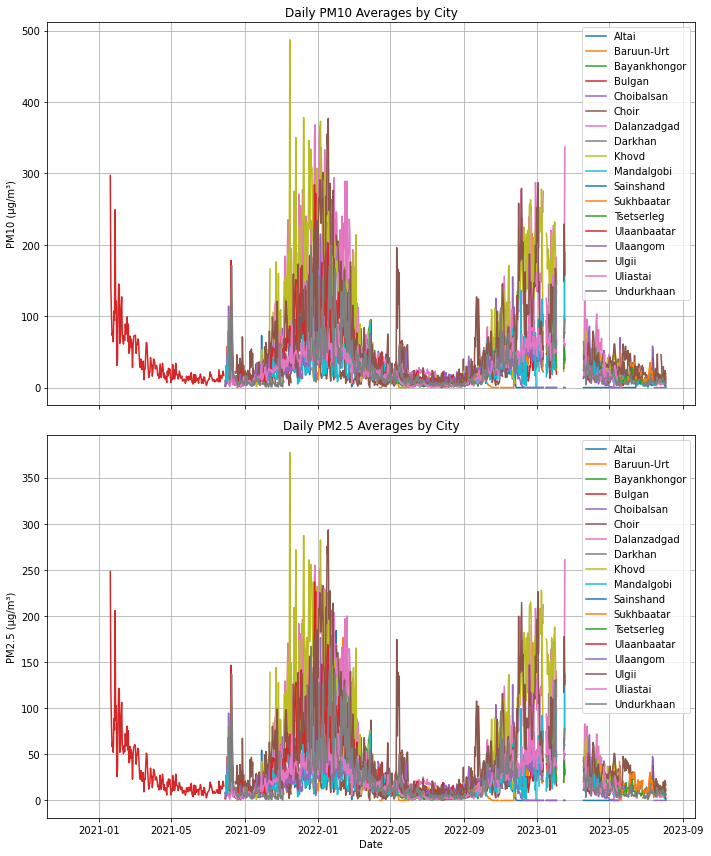

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'daily_averages' is your DataFrame with daily averages for each city
# Make sure 'date_column' is already converted to datetime

# Extract unique cities from the 'city' column
unique_cities = daily_averages['city'].unique()

# Create a new figure and axes for the plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# Plot PM10 data for each city
for city in unique_cities:
    city_data = daily_averages[daily_averages['city'] == city]
    ax1.plot(city_data['utc_time'], city_data['pm10_µg/m³'], label=city)

ax1.set_ylabel('PM10 (µg/m³)')
ax1.set_title('Daily PM10 Averages by City')
ax1.legend()
ax1.grid(True)

# Plot PM2.5 data for each city
for city in unique_cities:
    city_data = daily_averages[daily_averages['city'] == city]
    ax2.plot(city_data['utc_time'], city_data['pm25_µg/m³'], label=city)

ax2.set_xlabel('Date')
ax2.set_ylabel('PM2.5 (µg/m³)')
ax2.set_title('Daily PM2.5 Averages by City')
ax2.legend()
ax2.grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [15]:
import pandas as pd
import plotly.express as px

# Assuming 'daily_averages' is your DataFrame with daily averages for each city
# Make sure 'date_column' is already converted to datetime

# Create an interactive line plot for PM10 data
fig_pm10 = px.line(daily_averages, x='utc_time', y='pm10_µg/m³', color='city',
                   labels={'pm10_µg/m³': 'PM10 (µg/m³)', 'utc_time': 'Date'},
                   title='Daily PM10 Averages by City')
fig_pm10.update_xaxes(title_text='Date')
fig_pm10.update_yaxes(title_text='PM10 (µg/m³)')

# Create an interactive line plot for PM2.5 data
fig_pm25 = px.line(daily_averages, x='utc_time', y='pm25_µg/m³', color='city',
                   labels={'pm25_µg/m³': 'PM2.5 (µg/m³)', 'utc_time': 'Date'},
                   title='Daily PM2.5 Averages by City')
fig_pm25.update_xaxes(title_text='Date')
fig_pm25.update_yaxes(title_text='PM2.5 (µg/m³)')

# Display the interactive plots
fig_pm10.show()
fig_pm25.show()


In [64]:
outliers = daily_averages[daily_averages['pm1_µg/m³']> 800]

outliers

param_unit,city,utc_time,pm10_µg/m³,pm1_µg/m³,pm25_µg/m³,temperature_c,um003_particles/cm³,um050_particles/cm³,AQI,AQI Category,year


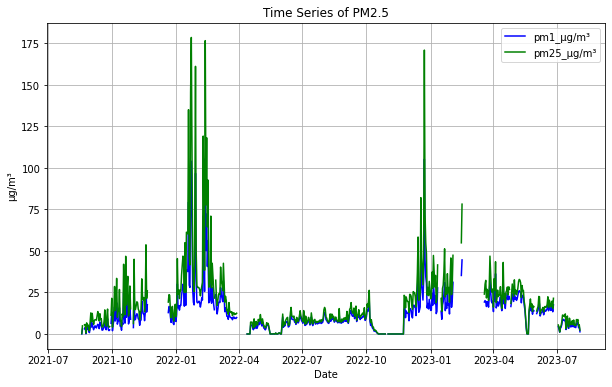

In [16]:
import matplotlib.pyplot as plt

baruun_urt = daily_averages[daily_averages['city'] == "Baruun-Urt"]

# Assuming 'value1' and 'value2' are the column names for the two series you want to plot
plt.figure(figsize=(10, 6))
plt.plot(baruun_urt['utc_time'], baruun_urt['pm1_µg/m³'], label='pm1_µg/m³', color='blue')
plt.plot(baruun_urt['utc_time'], baruun_urt['pm25_µg/m³'], label='pm25_µg/m³', color='green')
plt.xlabel('Date')
plt.ylabel('µg/m³')
plt.title('Time Series of PM2.5')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
def calculate_aqi(concentration, breakpoints):
    """
    Calculates the Air Quality Index (AQI) for a given concentration using EPA's AQI calculation method.

    Args:
        concentration (float): The concentration of a pollutant (e.g., PM10 or PM2.5).
        breakpoints (list): List of tuples containing AQI breakpoints and their corresponding concentration ranges.

    Returns:
        int: The calculated AQI value.
    """
    for i in range(1, len(breakpoints)):
        if concentration <= breakpoints[i][1]:
            c_low = breakpoints[i - 1][1]
            c_high = breakpoints[i][1]
            i_low = breakpoints[i - 1][0]
            i_high = breakpoints[i][0]
            return round(((i_high - i_low) / (c_high - c_low)) * (concentration - c_low) + i_low)
    
    # Set AQI to the highest AQI breakpoint if concentration is above the highest breakpoint
    highest_breakpoint = breakpoints[-1][0]
    return highest_breakpoint

def get_aqi_category(aqi_value):
    """
    Returns the AQI category based on the AQI value.

    Args:
        aqi_value (int): The calculated AQI value.

    Returns:
        str: The AQI category.
    """
    if aqi_value <= 50:
        return "Good"
    elif aqi_value <= 100:
        return "Moderate"
    elif aqi_value <= 150:
        return "Unhealthy for Sensitive Groups"
    elif aqi_value <= 200:
        return "Unhealthy"
    elif aqi_value <= 300:
        return "Very Unhealthy"
    elif aqi_value >= 301:
        return "Hazardous"
    else:
        return "None"

def add_aqi_column(dataframe):
    """
    Adds a new column 'AQI' to the given DataFrame using the PM10 and PM2.5 values.

    Args:
        dataframe (pandas.DataFrame): The DataFrame containing 'PM10' and 'PM2.5' columns.

    Returns:
        pandas.DataFrame: The DataFrame with an additional 'AQI' column.
    """
    breakpoints_pm10 = [
        (0, 0), (50, 54), (100, 154), (150, 254), (200, 354), (300, 424), (400, 504), (500, 604)

    ]

    breakpoints_pm25 = [
        (0, 0), (50, 12), (100, 35.4), (150, 55.4), (200, 150.4), (300, 250.4), (400, 350.4), (500, 500.4)
    ]

    # Calculate AQI for each row in the DataFrame based on PM10 and PM2.5 values
    aqi_values = []
    for _, row in dataframe.iterrows():
        pm10 = row['pm10_µg/m³']
        pm25 = row['pm25_µg/m³']

        if pd.notna(pm10) and pd.notna(pm25):  # Check for NaN values
            aqi_pm10 = calculate_aqi(pm10, breakpoints_pm10)
            aqi_pm25 = calculate_aqi(pm25, breakpoints_pm25)

            # Use the maximum AQI value from both PM10 and PM2.5 to represent the overall AQI
            aqi = max(aqi_pm10, aqi_pm25)

            aqi_values.append(aqi)
        else:
            aqi_values.append(None)  # Set AQI to None for rows with NaN values

    # Add the AQI column to the DataFrame
    dataframe['AQI'] = aqi_values

    return dataframe

# Assuming you have a pandas DataFrame named 'air_quality_data' with 'PM10' and 'PM2.5' columns
# You can add the 'AQI' column by calling the function add_aqi_column
air_quality_data = add_aqi_column(daily_averages)

# Adding a new column for AQI category
air_quality_data['AQI Category'] = air_quality_data['AQI'].apply(get_aqi_category)

air_quality_data

param_unit,city,utc_time,pm10_µg/m³,pm1_µg/m³,pm25_µg/m³,temperature_c,um003_particles/cm³,um050_particles/cm³,AQI,AQI Category
0,Altai,2020-11-27 00:00:00+00:00,0.0,0.000000,0.1,NaN,NaN,NaN,0.0,Good
1,Altai,2020-11-28 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,Altai,2020-11-29 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3,Altai,2020-11-30 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,Altai,2020-12-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...
12060,Undurkhaan,2023-07-30 00:00:00+00:00,11.0,5.742050,9.2,90.819253,16.973053,0.011617,38.0,Good
12061,Undurkhaan,2023-07-31 00:00:00+00:00,8.0,4.242006,6.7,90.417317,13.731178,0.005037,28.0,Good
12062,Undurkhaan,2023-08-01 00:00:00+00:00,5.0,2.232434,3.9,88.174601,9.868619,0.004570,16.0,Good
12063,Undurkhaan,2023-08-02 00:00:00+00:00,6.0,3.791313,5.4,78.376337,11.906570,0.001627,23.0,Good


In [18]:
air_quality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12065 entries, 0 to 12064
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype                  
---  ------               --------------  -----                  
 0   city                 12065 non-null  object                 
 1   utc_time             12065 non-null  datetime64[ns, tzutc()]
 2   pm10_µg/m³           8449 non-null   float64                
 3   pm1_µg/m³            8157 non-null   float64                
 4   pm25_µg/m³           8214 non-null   float64                
 5   temperature_c        169 non-null    float64                
 6   um003_particles/cm³  528 non-null    float64                
 7   um050_particles/cm³  628 non-null    float64                
 8   AQI                  8214 non-null   float64                
 9   AQI Category         12065 non-null  object                 
dtypes: datetime64[ns, tzutc()](1), float64(7), object(2)
memory usage: 942.7+ KB


In [68]:
# Extract year from 'utc_time'
air_quality_data['year'] = air_quality_data['utc_time'].dt.year

# Group by 'city' and 'year', and then count the occurrences of each category
grouped_AQI = air_quality_data.groupby(['city', 'year', 'AQI Category'])['AQI Category'].count().reset_index(name='count')

AQI_final = grouped_AQI.pivot_table(index=['city', 'year'], columns='AQI Category', values='count', fill_value=0).reset_index()

In [69]:
# Assign weighting factors to each category
weighting_factors = {
    'Unhealthy for Sensitive Groups': 1,
    'Unhealthy': 1.5,
    'Very Unhealthy': 2,
    'Hazardous': 2.5
}

# Calculate the total weighted sum for each row
AQI_final['Total'] = (AQI_final['Unhealthy for Sensitive Groups'] * weighting_factors['Unhealthy for Sensitive Groups'] +
                        AQI_final['Unhealthy'] * weighting_factors['Unhealthy'] +
                        AQI_final['Very Unhealthy'] * weighting_factors['Very Unhealthy'] +
                        AQI_final['Hazardous'] * weighting_factors['Hazardous'])

# Calculate the weighted average by dividing the total by 3 (for three years)
AQI_final['Weighted Average'] = AQI_final['Total'] / 3

# Create a function to map the weighted average to the corresponding grade
def map_to_grade(weighted_average):
    if 0.0 <= weighted_average < 0.3:
        return 'A'
    elif 0.3 <= weighted_average <= 0.9:
        return 'B'
    elif 1.0 <= weighted_average <= 2.0:
        return 'C'
    elif 2.1 <= weighted_average <= 3.2:
        return 'D'
    else:
        return 'F'

# Create a new column 'Total Count' with the sum of counts for all AQI categories
AQI_final['Total Count'] = AQI_final[['Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous', 'Good','Moderate', 'None']].sum(axis=1)

# Apply the mapping function to create the 'Grade' column for rows with more than 100 days of readings
AQI_final['Grade'] = AQI_final.apply(lambda row: map_to_grade(row['Weighted Average']) if row['Total Count'] > 100 else '', axis=1)

In [70]:
city2sum_mn = {"Bayankhongor" : "Баянхонгор", 
              "Baruun-Urt" : "Баруун-Урт", 
              "Ulgii" : "Өлгий", 
              "Ulaangom" : "Улаангом", 
              "Khovd" : "Ховд", 
              "Uliastai" : "Улиастай", 
              "Altai" : "Алтай", 
              "Tsetserleg" : "Цэцэрлэг", 
              "Bulgan" : "Булган", 
              "Sukhbaatar" : "Сүхбаатар", 
              "Darkhan" : "Дархан", 
              "Mandalgobi" : "Сайнцагаан", 
              "Dalanzadgad" : "Даланзадгад", 
              "Choir" : "Сүмбэр", 
              "Choibalsan" : "Чойбалсан", 
              "Undurkhaan" : "Хэрлэн", 
              "Sainshand" : "Сайншанд", 
              "Ulaanbaatar" : "Чингэлтэй"}

city2aimag = {"Bayankhongor" : "Bayankhongor", 
              "Baruun-Urt" : "Sukhbaatar", 
              "Ulgii" : "Bayan-Ulgii", 
              "Ulaangom" : "Uvs", 
              "Khovd" : "Khovd", 
              "Uliastai" : "Zavkhan", 
              "Altai" : "Govi-Altai", 
              "Tsetserleg" : "Arxangai", 
              "Bulgan" : "Bulgan", 
              "Sukhbaatar" : "Selenge", 
              "Darkhan" : "Darkhan-Uul", 
              "Mandalgobi" : "Dundgovi", 
              "Dalanzadgad" : "Omnogovi", 
              "Choir" : "Govisumber", 
              "Choibalsan" : "Dornod", 
              "Undurkhaan" : "Hentii", 
              "Sainshand" : "Dornogovi", 
              "Ulaanbaatar" : "Ulaanbaatar"}

# Adding Sum name in English
AQI_final['sum_mn'] = AQI_final['city'].map(city2sum_mn)

# Adding Aimag name in English
AQI_final['aimag_eng'] = AQI_final['city'].map(city2aimag)

city2aimag_mng = {"Bayankhongor" : "Баянхонгор", 
          "Baruun-Urt" : "Сүхбаатар", 
          "Ulgii" : "Баян-Өлгий", 
          "Ulaangom" : "Увс", 
          "Khovd" : "Ховд", 
          "Uliastai" : "Завхан", 
          "Altai" : "Говь-Алтай", 
          "Tsetserleg" : "Архангай", 
          "Bulgan" : "Булган", 
          "Sukhbaatar" : "Сэлэнгэ", 
          "Darkhan" : "Дархан-Уул", 
          "Mandalgobi" : "Дундговь", 
          "Dalanzadgad" : "Өмнөговь", 
          "Choir" : "Говьсүмбэр", 
          "Choibalsan" : "Дорнод", 
          "Undurkhaan" : "Хэнтий", 
          "Sainshand" : "Дорноговь", 
          "Ulaanbaatar" : "Улаанбаатар"}

# Adding Aimag name in Mongolian
AQI_final['aimag_mng'] = AQI_final['city'].map(city2aimag_mng)

In [71]:
# This cell collects population data and slices it for the years we need, and reshapes the data to merge with the AQI final data

dem_1990_2022 = pd.read_csv('Data/mon_population_1990to2022.csv')

dem_1990_2022_city = dem_1990_2022[dem_1990_2022['Байршлаар'] == 'Хот']

dem_2020_2022_city = dem_1990_2022_city[['Аймаг','2020', '2021', '2022']]

dem_2020_2022_city

# Melt the DataFrame to reshape it
melted_dem_2020_2022 = pd.melt(dem_2020_2022_city, id_vars=['Аймаг'], var_name='year', value_name='pop_count')

# Clean up the 'pop_count' column by removing commas and converting to numeric
melted_dem_2020_2022['pop_count'] = melted_dem_2020_2022['pop_count'].str.replace(',', '', regex=True).astype(int)

# change year to int64
melted_dem_2020_2022['year'] = melted_dem_2020_2022['year'].astype(int)

# Drop duplicate
melted_dem_2020_2022 = melted_dem_2020_2022.drop_duplicates()

# Reset the index
melted_dem_2020_2022.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
melted_dem_2020_2022

,Аймаг,year,pop_count
0,Улсын дүн,2020,2316499
1,Баруун бүс,2020,139114
2,Баян-Өлгий,2020,41774
3,Говь-Алтай,2020,18747
4,Завхан,2020,16292
...,...,...,...
76,Зүүн бүс,2022,95130
77,Дорнод,2022,46742
78,Сүхбаатар,2022,20441
79,Хэнтий,2022,27947


In [72]:
# Merge the DataFrames based on 'Аймаг' and 'year' columns
AQI_final = AQI_final.merge(melted_dem_2020_2022, left_on=['aimag_mng', 'year'], right_on=['Аймаг', 'year'], how='left')

# Drop the redundant 'Аймаг' column from the merged DataFrame if needed
AQI_final.drop(columns=['Аймаг'], inplace=True)

AQI_final

,city,year,Good,Hazardous,Moderate,None,Unhealthy,Unhealthy for Sensitive Groups,Very Unhealthy,Total,Weighted Average,Total Count,Grade,sum_mn,aimag_eng,aimag_mng,pop_count
0,Altai,2020,1,0,0,34,0,0,0,0.0,0.000000,35,,Алтай,Govi-Altai,Говь-Алтай,18747.0
1,Altai,2021,52,0,49,214,29,21,0,64.5,21.500000,365,F,Алтай,Govi-Altai,Говь-Алтай,18720.0
2,Altai,2022,161,0,124,5,46,27,2,100.0,33.333333,365,F,Алтай,Govi-Altai,Говь-Алтай,18695.0
3,Altai,2023,182,0,2,84,0,0,0,0.0,0.000000,268,A,Алтай,Govi-Altai,Говь-Алтай,NaN
4,Baruun-Urt,2021,50,0,46,47,1,4,0,5.5,1.833333,148,C,Баруун-Урт,Sukhbaatar,Сүхбаатар,19655.0
5,Baruun-Urt,2022,201,0,106,18,17,19,4,52.5,17.500000,365,F,Баруун-Урт,Sukhbaatar,Сүхбаатар,20441.0
6,Baruun-Urt,2023,51,0,95,72,1,14,0,15.5,5.166667,233,F,Баруун-Урт,Sukhbaatar,Сүхбаатар,NaN
7,Bayankhongor,2022,150,0,59,79,44,23,4,97.0,32.333333,359,F,Баянхонгор,Bayankhongor,Баянхонгор,32211.0
8,Bayankhongor,2023,84,0,43,85,4,19,0,25.0,8.333333,235,F,Баянхонгор,Bayankhongor,Баянхонгор,NaN
9,Bulgan,2021,49,0,66,11,6,23,0,32.0,10.666667,155,F,Булган,Bulgan,Булган,15786.0


In [73]:
AQI_final.to_csv("Data/AQI_final.csv", index=False) 